In [34]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import os
import numpy as np

In [35]:
DATA_PATH = "./"
ITERATIONS = ["_1","_2","_3","_4","_5"]

#Device Arrays as needed for plotting

#All Devices
DEVICES_ALL = ["6312kw", "adns5700", "apple1152","arduino", "bt58", "diamondback", "dragonrise_black",
               "dragonrise_green", "dualshock3_wired", "dualshock4_wired", "dualshock4_wireless",
               "exxter", "g15", "g300", "g5", "g700_wired", "g700_wireless", "g9", "gembird", "intelli_new",
               "intelli_og", "k120", "logilink0043", "nixdorf", "nvidiashield", "nvidiashield_wireless",
               "px1800", "rapoo", "rival", "roccat", "rx250", "sigma", "sk9620", "sunplus", "tramani_wired",
               "trust_oni_wireless", "unicomp", "wingman", "xbox360_wired", "xbox360_wireless", "xboxone_wireless"]

#Only Mice (ordered)
DEVICES_MICE = ["g5","g300","g700_wired", "g9", "intelli_new","diamondback","rival","bt58",
                "rx250","bt58","sunplus","intelli_og","logilink0043","apple1152", "adns5700"]

#Only Keyboards (ordered)
DEVICES_KEYBOARDS = ["px1800","roccat","sk9620","nixdorf","unicomp","sigma","k120","exxter","g15","gembird", "6312kw"]

#Only Gamepads excluding arduino (ordered)
DEVICES_GAMEPADS = ["wingman","dualshock4_wireless","nvidiashield","dualshock4_wired","xbox360_wired","xboxone_wireless","dualshock3_wired",
                    "nvidiashield_wireless","xbox360_wireless","tramani_wired","dragonrise_green","dragonrise_black"]

#Only Gamepads wired
DEVICES_GAMEPADS_WIRED = ["dragonrise_green","wingman","dragonrise_black","dualshock4_wired",
                          "tramani_wired","dualshock3_wired","xbox360_wired","nvidiashield"]

#Only Gamepads wired
DEVICES_GAMEPADS_WIRELESS= ["xboxone_wireless", "xbox360_wireless","nvidiashield_wireless"]

DEVICES_WITH_SPECIAL_DATA =["tramani_wired", "g15", "dragonrise_black"]

DEVICES_WW =["g700_wired", "g700_wireless","nvidiashield", "nvidiashield_wireless","xbox360_wired", "xbox360_wireless"]


#Devices with odd Data
#DEVICES = ["diamondback", "exxter", "arduino"]


#TODO xbox360_wired polling rate
POLLING_RATES = {"6312kw" : -1, "adns5700" : 10, "apple1152" : 10, "arduino" : 1, 
                 "bt58" : 10, "diamondback" : 10, "dragonrise_black" : 10, "dragonrise_green" : 10, 
                 "dualshock3_wired" : 1, "dualshock4_wired" : 5, "dualshock4_wireless" : -1, "exxter" : 10, 
                 "g15" : 24, "g300" : 1, "g5" : 10, "g9": 10, "g700_wired" : 1, "g700_wireless" : -1, "gembird" : 10, 
                 "intelli_new" : 1, "intelli_og" : -1, "k120" : 10, "logilink0043" : 10, "nixdorf" : -1, 
                 "nvidiashield" : 1, "nvidiashield_wireless" : -1, "px1800" : 10, "rapoo" : -1, "rival" : 1, 
                 "roccat" : 1, "rx250" : 10, "sigma" : 10, "sk9620" : -1, "sunplus" : 10, 
                 "tramani_wired" : 10, "trust_oni_wireless" : 10, "unicomp" : 10, "wingman" : 10, 
                 "xbox360_wired" : -1, "xbox360_wireless" : -1, "xboxone_wireless" : -1}

DEVICE_NAMES ={"6312kw" : "Acer 6312-KW", "adns5700" : "Microsoft Optical Mouse 200", "apple1152" : "Apple A1152",
               "arduino" : "Arduino Micro","bt58" : "Logitech Premium Optical Wheel Mouse",
               "diamondback" : "Razord Diamondback","dragonrise_black" : "Speedlink Strike (Black)",
               "dragonrise_green" : "Speedlink Strike (Green)", "dualshock3_wired" : "Sony Dualshock 3",
               "dualshock4_wired" : "Sony Dualshock 4 (wired)", "dualshock4_wireless" : "Sony Dualshock 4 (wireless)",
               "exxter" : "Exxter KE-200", "g15" : "Logitech G15", "g300" : "Logitech G300", "g5" : "Logitech G5",
               "g9" : "Logitech G9","g700_wired" : "Logitech G700", "g700_wireless" : "Logitech G700", "gembird" : "Gembird", 
               "intelli_new" : "Microsoft Intellimouse", "intelli_og" : "Microsoft Classic Intellimouse", 
               "k120" : "Logitech K120", "logilink0043" : "LogiLink ID0043", "nixdorf" : "Siemens Nixdorf", 
               "nvidiashield" : "nVidia Shield", "nvidiashield_wireless" : "nVidia Shield", "px1800" : "PX-1800",
               "rapoo" : "Rapoo 6010B", "rival" : "Steel Series Rival Optical Mouse", "roccat" : "Roccat ISKU FX",
               "rx250" : "Logitech RX250", "sigma" : "Sigma", "sk9620" : "Acer SK-9620", "sunplus" : "MS-TECH Laser Game Mouse",
               "tramani_wired" : "Tramani CT-P3000", "trust_oni_wireless" : "Trust Oni Wireless Micro Mouse",
               "unicomp" : "Unicomp Keyboard", "wingman" : "Logitech Wingman", "xbox360_wired" : "XBox 360 wired",
               "xbox360_wireless" : "XBox 360 (wireless)", "xboxone_wireless" : "XBox One Controller"}

MODES = ["default_polling", "1ms_polling"]

all_raw_data = []

#print(os.system("ls"))
DEVICES = DEVICES_GAMEPADS_WIRED
for device in DEVICES:
    for mode in MODES:
        for iteration in ITERATIONS:
            if mode == "default_polling":
                path = DATA_PATH + mode + "/" + "AUTO_" + device + "_0ms" + iteration +".csv"
                try:
                    #print(path)
                    currentFile = pd.read_csv(path, comment="#", delimiter=';')
                except:
                    print("file missing: ", path)
                currentFile["device"] = device
                
                #label = POLLING_RATES[device]
                #if(label == -1):
                #    label = "unknown"
                #label = "default {}ms".format(label)
                
                currentFile["polling"] = "default"
                currentFile["pollingRate"] = POLLING_RATES[device]
            else:
                path = DATA_PATH + mode + "/" + "AUTO_" + device + "_1ms" + iteration +".csv"
                try:
                    currentFile = pd.read_csv(path, comment="#", delimiter=';')
                except:
                    print("file missing: ", path)
                currentFile["device"] = device
                #currentFile["polling"] = "forced 1ms"
                currentFile["polling"] = "forced"
                currentFile["pollingRate"] = 1
            #print(type(currentFile))
            #print(len(currentFile))
            #print(currentFile)
            
            # vllt später
            #if(currentFile["pollingRate"] == -1):
            #    currentFile["pollingRate"] = "unknown"
            
            all_raw_data.append(currentFile)
all_data = pd.concat(all_raw_data)
#all_data["latency (ms)"] = all_data["latency (s)"] * 1000.0

In [36]:
sns.set_style("whitegrid")

In [6]:
def plot_multi(data1,data2, plot_file_names=False):
    fig, axes = plt.subplots(ncols=6, sharey=True)
    data_combined=[data1["latency"],data2["latency"]]
    
    # barplots
    sns.barplot(data=data_combined, ci=95, n_boot=1000, units=None, orient=None, color='grey',ax=axes[0])
    axes[0].set_title("barplot")
    # plt.ylabel("latency (ms)")
    # boxplots    
    sns.boxplot(data=data_combined, color='grey', saturation=0.75, width=0.8, fliersize=5, linewidth=None, whis=1.5, ax=axes[1])    
    axes[1].set_title("boxplot")
    #violinplots
    sns.violinplot(data=data_combined, scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, linewidth=None, color='grey', saturation=0.75, ax=axes[2])
    axes[2].set_title("violinplot")
    # distplots
    sns.distplot(data1["latency"],rug=False,color='grey', ax=axes[3], vertical=True, axlabel=False)
    sns.distplot(data2["latency"],color='black', ax=axes[4], vertical=True, axlabel=False)
    axes[3].set_title("histplot 1")
    axes[4].set_title("histplot 2")
    axes[3].invert_xaxis()
    #sns.swarmplot((data1["latency"]/1000), data1["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="v", alpha=1, ax =axes[5])
    #sns.swarmplot((data2["latency"]/1000), data2["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="v", alpha=1, ax =axes[5])
    #axes[5].set_title("swarmplot")
    
    
    plt.show()
   # generate file -> TODO Pfad

/home/lzrdwzrd/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


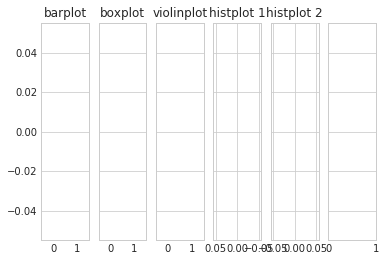

In [7]:
multiplotdevice1 = all_data[((all_data["device"]) == "dragonrise_green") & ((all_data["polling"]) == "default 10ms")]
multiplotdevice2 = all_data[((all_data["device"]) == "g15") & ((all_data["polling"]) == "default 10ms")]

plot_multi(multiplotdevice1, multiplotdevice2)

dragonrise_green
wingman
dragonrise_black
dualshock4_wired
tramani_wired
dualshock3_wired
xbox360_wired
nvidiashield


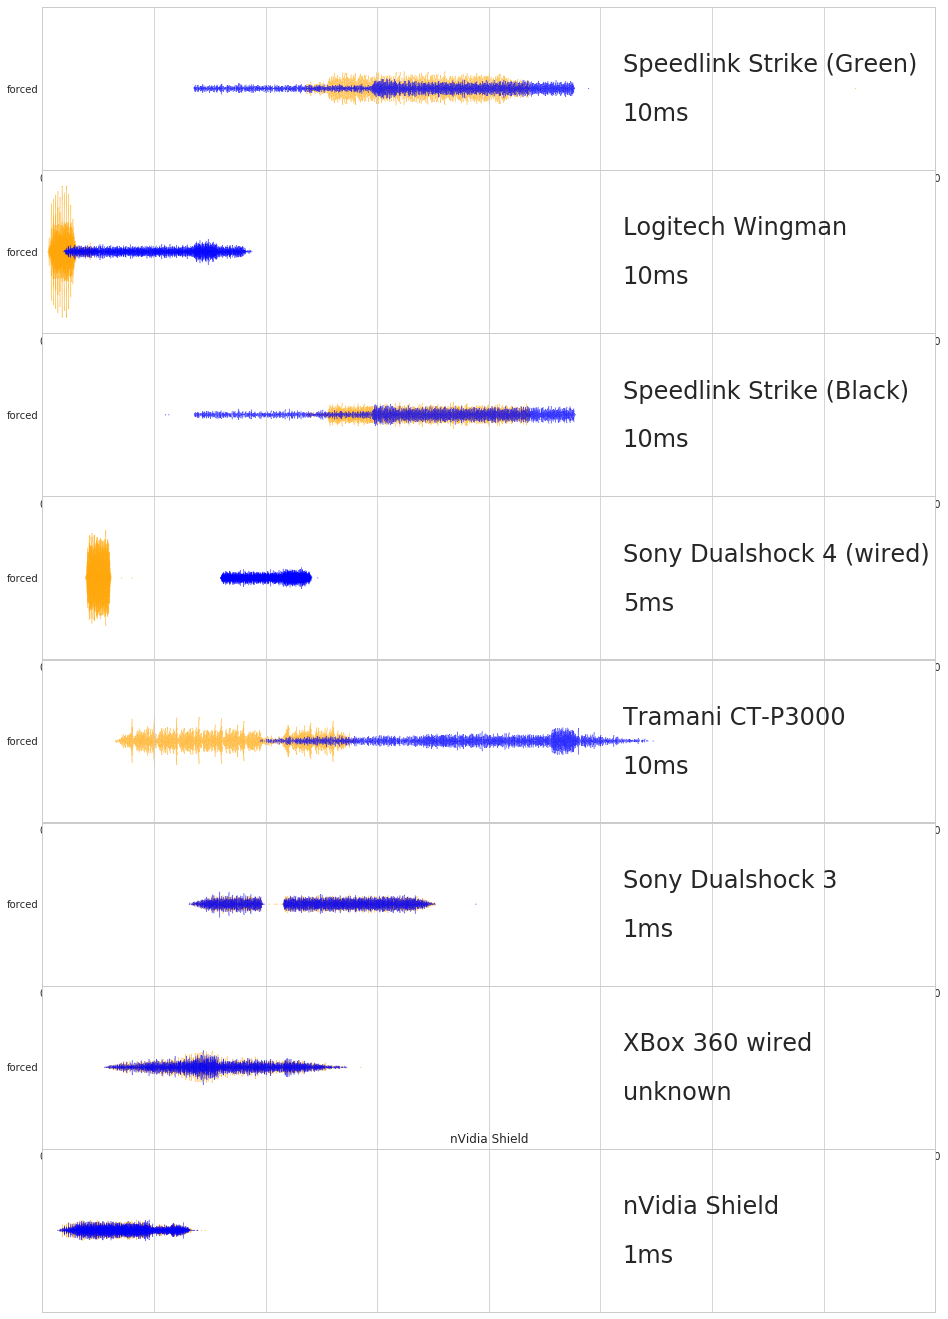

In [37]:
i = 0

import os
MAX_LATENCY = 100000 # microseconds

fig, axes = plt.subplots(len(DEVICES), 1)
plt.subplots_adjust(hspace = .001)
#axes.set_frame_on[False]

#axes.set_height(5)
fig.set_figheight(3 * len(DEVICES))
fig.set_figwidth(16)

poll_nice = {1: "1ms", 10: "10ms", 24: "24ms", -1: "unknown", 5: "5ms"}

for device in DEVICES:
    
    
    #values_default = all_data[(all_data["device"] == DEVICES[i]) & ("default" in all_data["polling"])]
    values = all_data[((all_data["device"]) == DEVICES[i])]
    #values_forced = all_data[((all_data["device"]) == DEVICES[i]) & (all_data["polling"] != "default_polling")]
    #values_forced = all_data[((all_data["device"]) == DEVICES[i])]
   
    
    
    values_default = values[values["latency"]<=MAX_LATENCY]
    values_default = values_default[values_default["polling"] == "default"]
    
    values_forced = values[values["latency"]<=MAX_LATENCY]
    values_forced = values_forced[values_forced["polling"] == "forced"]
    #values_default = values_default[values_default["polling"]("default")]
    values_forced = values_forced[(values_forced["latency"]<=MAX_LATENCY) & ("default" not in values_forced["polling"])] 
    
    #print(values_default)
    
    plt.title(DEVICE_NAMES[device])
    swarmi_default = sns.swarmplot((values_default["latency"]/1000), values_default["polling"], color="b", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=1, ax=axes[i])
    swarmi_forced = sns.swarmplot((values_forced["latency"]/1000), values_forced["polling"], color="orange", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0, ax=axes[i])
    #swarmi_forced.set_xlim(0, 50)
    swarmi_default.set_xlim(0, 40)
   
    swarmi_forced.set(xlabel='', ylabel="")
    swarmi_default.set(xlabel='', ylabel="")
    plt.tick_params(top='off', bottom='off', left='on', right='off', labelleft='off', labelbottom='off')
    
    
    axes[i].text(26,-0.1, DEVICE_NAMES[device], fontsize=24)
    axes[i].text(26, 0.2, poll_nice[POLLING_RATES[device]], fontsize=24)
    
    i = i+1
    
    
    
    #plt.savefig("png/{}alpha1.png".format(DEVICE_NAMES[device]), dpi=600)
    
    print(device)
    
    # automatically print it - use carefully!
    #os.system("lp png/{}.png".format(device))
    
    #plt.close(fig)
    
#swarmi_forced.set(xlabel='latency in ms', ylabel="")   
    
#plt.savefig("png/TestAll20122018.png", dpi=300)
#plt.savefig("svg/special.svg", dpi=300)



In [9]:
print(len(DEVICES))

11


ValueError: min() arg is an empty sequence

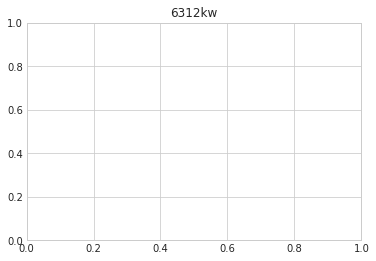

In [10]:
values = all_data[(all_data["device"]) == "diamondback"]

plt.title(device)

ax = sns.pointplot((values["latency"]/1000), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1, errwidth=0.5, capsize=.2, ax =axes)
ax = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0)

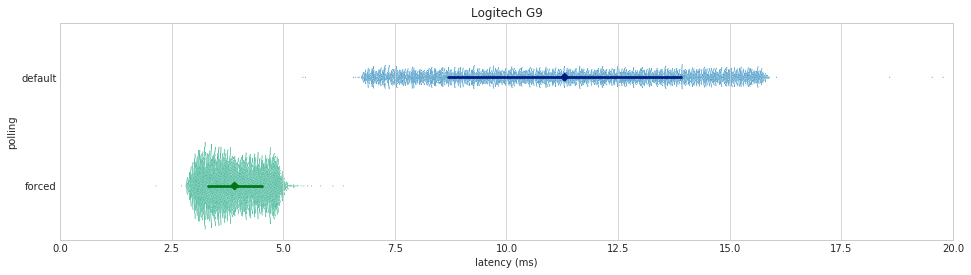

In [40]:
values = all_data[(all_data["device"] == "g9")]


plt.figure(figsize=[16, 4])
#plt.title('Swarmplot of '+ values["device"])

ax = sns.pointplot((values["latency"]/1000), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1)
ax = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0)

plt.title(DEVICE_NAMES["g9"])
plt.xlabel("latency (ms)")
plt.xlim(0, 20)

axes = plt.gca()
#axes.set_xlim(0,100)

In [ ]:
#Plotting all devices in one picture
i = 0

#plt.xlim(0, 80)
fig, axes = plt.subplots((len(DEVICES)), 1)


fig.set_figheight(4 * len(DEVICES))
fig.set_figwidth(16)

#fig(xlim = [0,80])


#axes.set_xlabel("latency (ms)")
#axes = plt.gca()
#axes.set_xlim([0,80])



for device in DEVICES:
    values = all_data[(all_data["device"]) == DEVICES[i]]

    plt.title('Swarmplot of '+ device)
    #sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="Set2",size=1,orient="h",alpha=1, ax=axes[i])    
    
    #point_plot = sns.pointplot((values["latency"]/1000), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1, ax=axes[i], capsize=.2)
    swarm_plot = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0, edgecolors='w', ax=axes[i])

    POLLING_RATES[device]
    
    axes[i].set_xlim(0, 40)
    i = i+1
    print(device)


plt.savefig("svg/allDevices.svg")
plt.savefig("png/allDevices.png")

In [13]:
#Plotting a single swarmplot
values = all_data[(all_data["device"] == "g9")]

plt.figure(figsize=[16, 8])
#plt.title('Swarmplot of '+ values["device"])

#plt.figure()

ax = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="Set1", size=1,marker ="H", orient="h", alpha=1)
#ax = sns.violinplot((values["latency"]/1000), values["polling"], inner=None, palette="Set2", split=True )
plt.xlabel("latency (ms)")
plt.xlim(0, 100)

#axes = plt.gca()
#axes.set_xlim(0,100)

ValueError: min() arg is an empty sequence

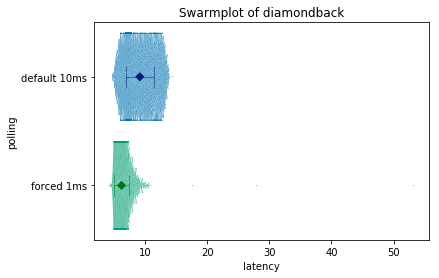

In [17]:
MAX_LATENCY = 100000 # microseconds
values = all_data[(all_data["device"]) == "diamondback"]
values = values[values["latency"]<=MAX_LATENCY]
plt.title('Swarmplot of '+ device)

ax = sns.pointplot((values["latency"]/1000), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1, errwidth=0.5, capsize=.2)
ax = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0)

#plt.savefig("svg/test1.svg")
#plt.savefig("png/test1.png")